In [1]:
%env CUDA_VISIBLE_DEVICES=-1
import h5py
import math
import torch
import pylab as plt
plt.style.use('dark_background')

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

env: CUDA_VISIBLE_DEVICES=-1


In [3]:
hf = h5py.File('/home/a_razumov/smbmount_a_razumov/brains_fastMRI/multicoil_val/file_brain_AXFLAIR_200_6002462.h5')
# hf = h5py.File('/home/a_razumov/smbmount_a_razumov/brains_fastMRI/multicoil_val/file_brain_AXT1POST_200_6001976.h5')
print(hf.keys())
ks_zc = torch.from_numpy(hf['kspace'][:]).cfloat().to(device)
imgs_zc = torch.fft.ifftshift(torch.fft.ifftn(ks_zc, dim=(-1,-2)), dim=(-1,-2)).abs()
ks_zc.shape

<KeysViewHDF5 ['ismrmrd_header', 'kspace', 'reconstruction_rss']>


torch.Size([16, 16, 640, 320])

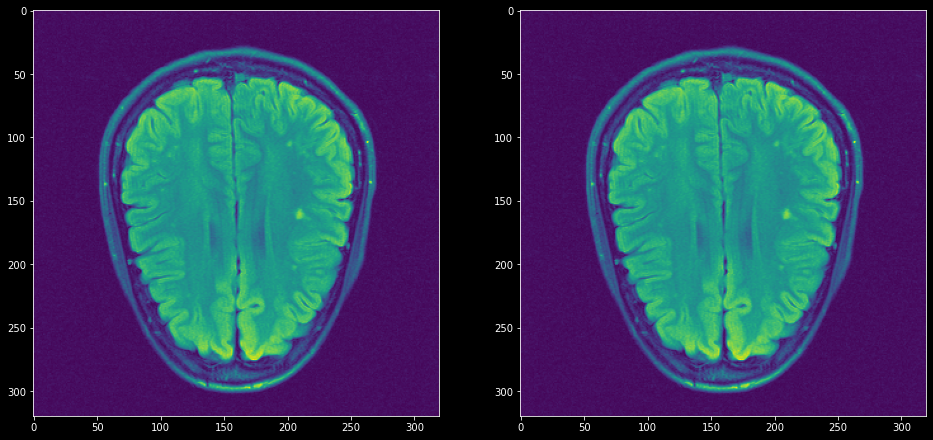

In [4]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(imgs_zc[5].square().sum(dim=0).sqrt().abs().cpu()[160:-160])
plt.subplot(122)
plt.imshow(hf['reconstruction_rss'][5])
plt.show()